In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D, Flatten,Dropout,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [50]:
df = pd.read_csv("/content/drive/MyDrive/Telco_Customer_Churn.csv")

In [51]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [52]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [53]:
df.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2479,1088-AUUZZ,Male,0,Yes,Yes,56,Yes,Yes,DSL,Yes,...,No,Yes,No,Yes,Two year,Yes,Credit card (automatic),75.85,4261.2,No


In [54]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [55]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [56]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [57]:
fig = fisize =(8,10)
fig = px.box(df,x='MonthlyCharges')
fig.show()

In [58]:
fig = px.box(df,x='tenure')
fig.show()

In [59]:
q1=df['tenure'].quantile(0.25)
q3=df['tenure'].quantile(0.75)
iqr = q3 - q1


In [60]:
lower = q1 - (1.5 * iqr)
upper = q3 +(1.5 * iqr)

outilers =df.loc[((df['tenure'] > upper ) | (df['tenure']< lower )) ]

In [61]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


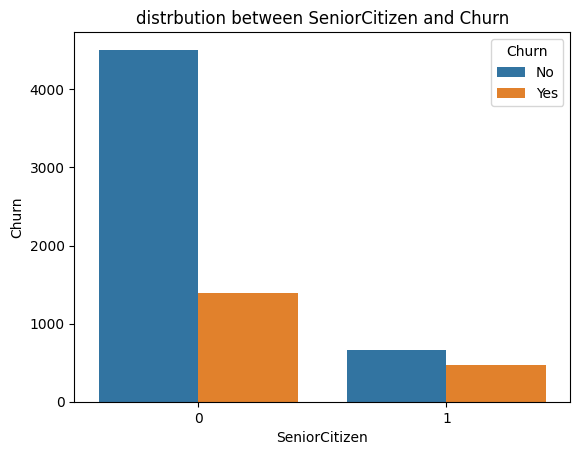

In [62]:
fig = figsize = (8,10)
sns.countplot(df, x ='SeniorCitizen', hue='Churn')
plt.title('distrbution between SeniorCitizen and Churn')
plt.xlabel('SeniorCitizen')
plt.ylabel('Churn')
plt.show()

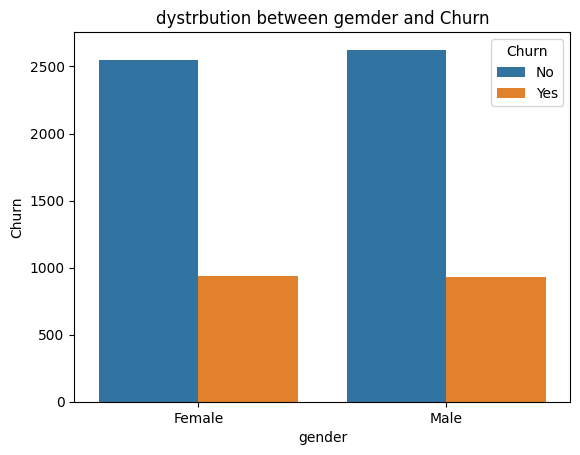

In [63]:
sns.countplot(df, x = 'gender' , hue = 'Churn')
plt.title('dystrbution between gemder and Churn')
plt.xlabel('gender')
plt.ylabel('Churn')
plt.show()

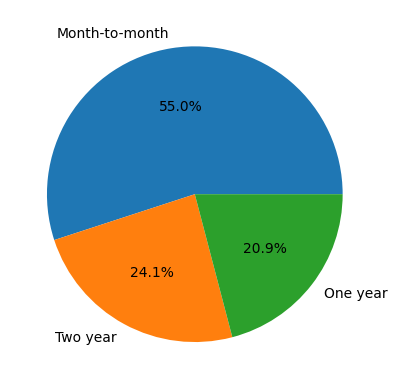

In [64]:
contract_count= df['Contract'].value_counts()
plt.pie(contract_count.values,labels=contract_count.index , autopct = "%.1f%%")
plt.show()

In [65]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [66]:
featur_catigrical=['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'TotalCharges', 'Churn']

In [67]:
for col in featur_catigrical:
  print(col)
  print(df[col].value_counts())
  print('/n')

customerID
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
/n
gender
gender
Male      3555
Female    3488
Name: count, dtype: int64
/n
Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64
/n
Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
/n
PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
/n
MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
/n
InternetService
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
/n
OnlineSecurity
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
/n
OnlineBackup
OnlineBackup
No                     3088
Yes          

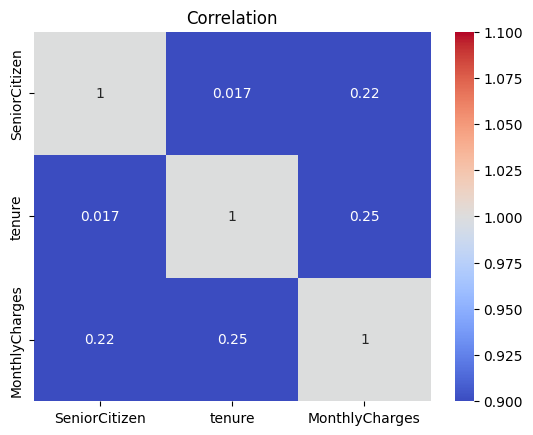

In [69]:
numerical_coulmn = ['SeniorCitizen',	'tenure',	'MonthlyCharges']
corr= df[numerical_coulmn].corr()
sns.heatmap(corr , annot=True, cmap='coolwarm',vmin=1,vmax=1)
plt.title('Correlation')
plt.show()

In [71]:
label_encoder = LabelEncoder()
featur_catigrical=['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'TotalCharges', 'Churn']
for column in featur_catigrical:
  df[column] = label_encoder.fit_transform(df[column])

In [72]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [73]:
df.drop(['customerID'], axis =1, inplace=True)

In [74]:
X=df.drop(['Churn'],axis=1)
y=df['Churn']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2, random_state=42)

In [77]:
SCALE= StandardScaler()
scaler=SCALE.fit_transform(X_train)
tscale= SCALE.transform(X_test)

In [79]:
min = MinMaxScaler()
m= min.fit_transform(X_train)
c=min.transform(X_test)

Churn
0    5174
1    1869
Name: count, dtype: int64


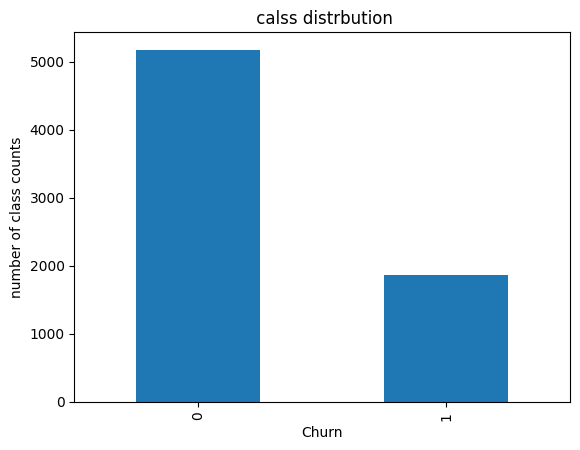

In [82]:
class_counts= df['Churn'].value_counts()
print(class_counts)

class_counts.plot(kind ='bar', title=" calss distrbution")
plt.xlabel('Churn')
plt.ylabel('number of class counts')
plt.show()

In [91]:
smoteen= SMOTEENN(random_state=42)
X_train_esample,y_train_resmaple= smoteen.fit_resample(X_train,y_train)
print(pd.Series(y_train_resmaple).value_counts())

Churn
1    2451
0    2157
Name: count, dtype: int64


In [95]:
smoteen = SMOTEENN(random_state=42)
X_train_resample,y_train_resample = smoteen.fit_resample(X_train,y_train)
print(pd.Series(y_train_resample.value_counts()))

Churn
1    2451
0    2157
Name: count, dtype: int64


In [96]:
model = Sequential()

In [101]:
model.add(Dense(units=6, input_dim=X_train.shape[1] ,kernel_initializer='uniform' ,activation='relu'))

In [103]:
model.add(Dense(units=6,activation='relu'))
model.add(Dense(units=6,activation='relu'))

In [105]:
model.add(Dense(1,activation='sigmoid'))

In [106]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 6)                   │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 253 (1012.00 B)

 Trainable params: 253 (1012.00 B)

 Non-trainable params: 0 (0.00 B)

In [111]:
model.compile(optimizer='adam',loss='binary_crossentropy' , metrics=['accuracy'])

In [112]:
model.fit(X_train,y_train,batch_size=1,epochs=3,validation_split=0.2)

Epoch 1/3
4507/4507 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.7292 - loss: 0.6597 - val_accuracy: 0.7507 - val_loss: 0.4759
Epoch 2/3
4507/4507 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7455 - loss: 0.4946 - val_accuracy: 0.7507 - val_loss: 0.4525
Epoch 3/3
4507/4507 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7369 - loss: 0.5138 - val_accuracy: 0.7906 - val_loss: 0.4552


In [113]:
model.evaluate(X_test,y_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7977 - loss: 0.4548


[0.45215529203414917, 0.802696943283081]

In [114]:
y_pred=model.predict(X_test)
y_pred_class=(y_pred>0.5).astype('int32')

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [115]:
acc= accuracy_score(y_test,y_pred_class)
print(acc)

0.8026969481902059


In [116]:
p= precision_score(y_test,y_pred_class)
print(p)

0.6907630522088354


In [117]:
class_report=classification_report(y_test,y_pred_class)
print('classification report')
print(class_report)

classification report
              precision    recall  f1-score   support

           0       0.83      0.93      0.87      1036
           1       0.69      0.46      0.55       373

    accuracy                           0.80      1409
   macro avg       0.76      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [118]:
history = model.fit(X_train,y_train,batch_size=1,epochs=3,validation_split=0.2)

Epoch 1/3
4507/4507 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.7663 - loss: 0.4859 - val_accuracy: 0.7507 - val_loss: 0.5417
Epoch 2/3
4507/4507 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.7367 - loss: 0.4870 - val_accuracy: 0.7631 - val_loss: 0.4438
Epoch 3/3
4507/4507 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.7510 - loss: 0.4940 - val_accuracy: 0.7507 - val_loss: 0.4514


<function matplotlib.pyplot.show(close=None, block=None)>

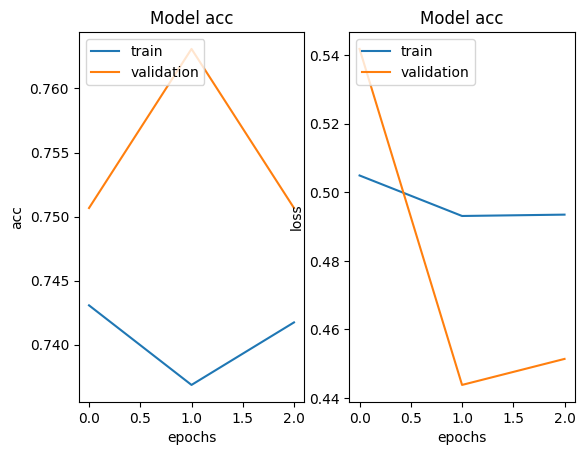

In [122]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'] ,  label= 'train_accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('Model acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend(['train','validation'],loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title('Model acc')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','validation'],loc='upper left')
plt.show

In [ ]:
pd.df(history.history).plot()

In [ ]:
model.save('trained_model.h5')